# EMD Lung Sound

In [1]:
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
import librosa.display
import pandas as pd
import wave

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/andrine/Desktop/Master/Andrine_Elsetronning_PreProject2020/src/data')

import read_sound_split_sound

/home/andrine/anaconda3/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/andrine/anaconda3/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [20]:
target_rate = 44100
data_path = 'audio_samples/'
file_names = [file_name for file_name in os.listdir(data_path) if '.wav' in file_name] 
audio_file = data_path + file_names[1]


sr, audio = read_sound_split_sound.read_wav_file('/home/andrine/Desktop/Master/Andrine_Elsetronning_PreProject2020/data/Kaggle/raw/101_1b1_Al_sc_Meditron.wav', target_rate)

In [19]:
audio_r = audio[0:min(int(5 * sr), len(audio))]

In [26]:
audio = audio[0:min(int(5 * sr), len(audio))]

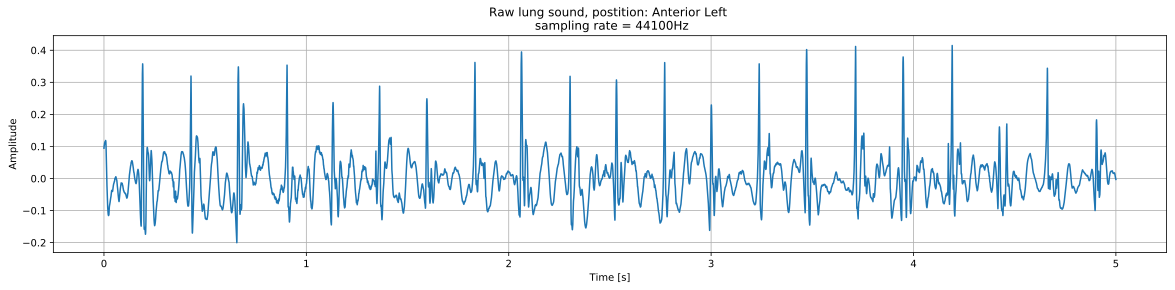

In [27]:
duration = float(len(audio)) / sr
T = 1.0/sr
N = int(duration / T)

y = audio
x = np.linspace(0.0, N*T, N)

plt.figure(figsize=(20, 4))
plt.plot(x, y)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title(f'Raw lung sound, postition: Anterior Left \n sampling rate = {sr}Hz')
plt.grid()
plt.draw()
#plt.savefig('raw_lung_plot_left.svg')

In [86]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='stop')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(lowcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = butter(order, low, btype='high')
    return b, a


def butter_highpass_filter(data, lowcut, fs, order=5):
    b, a = butter_highpass(lowcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

<IPython.core.display.Javascript object>


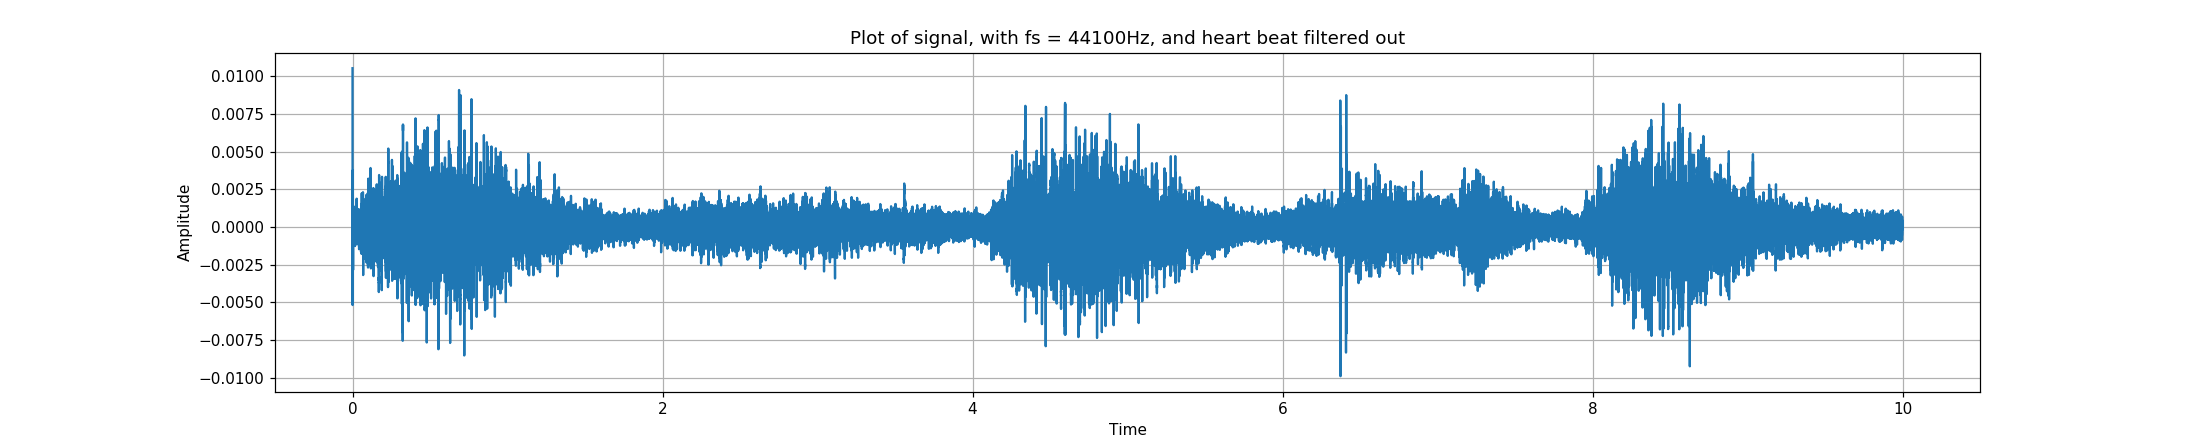

In [87]:
lowcut = 100
highcut = 2500  

y_filtered = butter_highpass_filter(y , lowcut, sr)

plt.figure(figsize=(20, 4))
plt.plot(x, y_filtered)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title(f'Plot of signal, with fs = {sr}Hz, and heart beat filtered out')
plt.grid()
plt.draw()

<IPython.core.display.Javascript object>


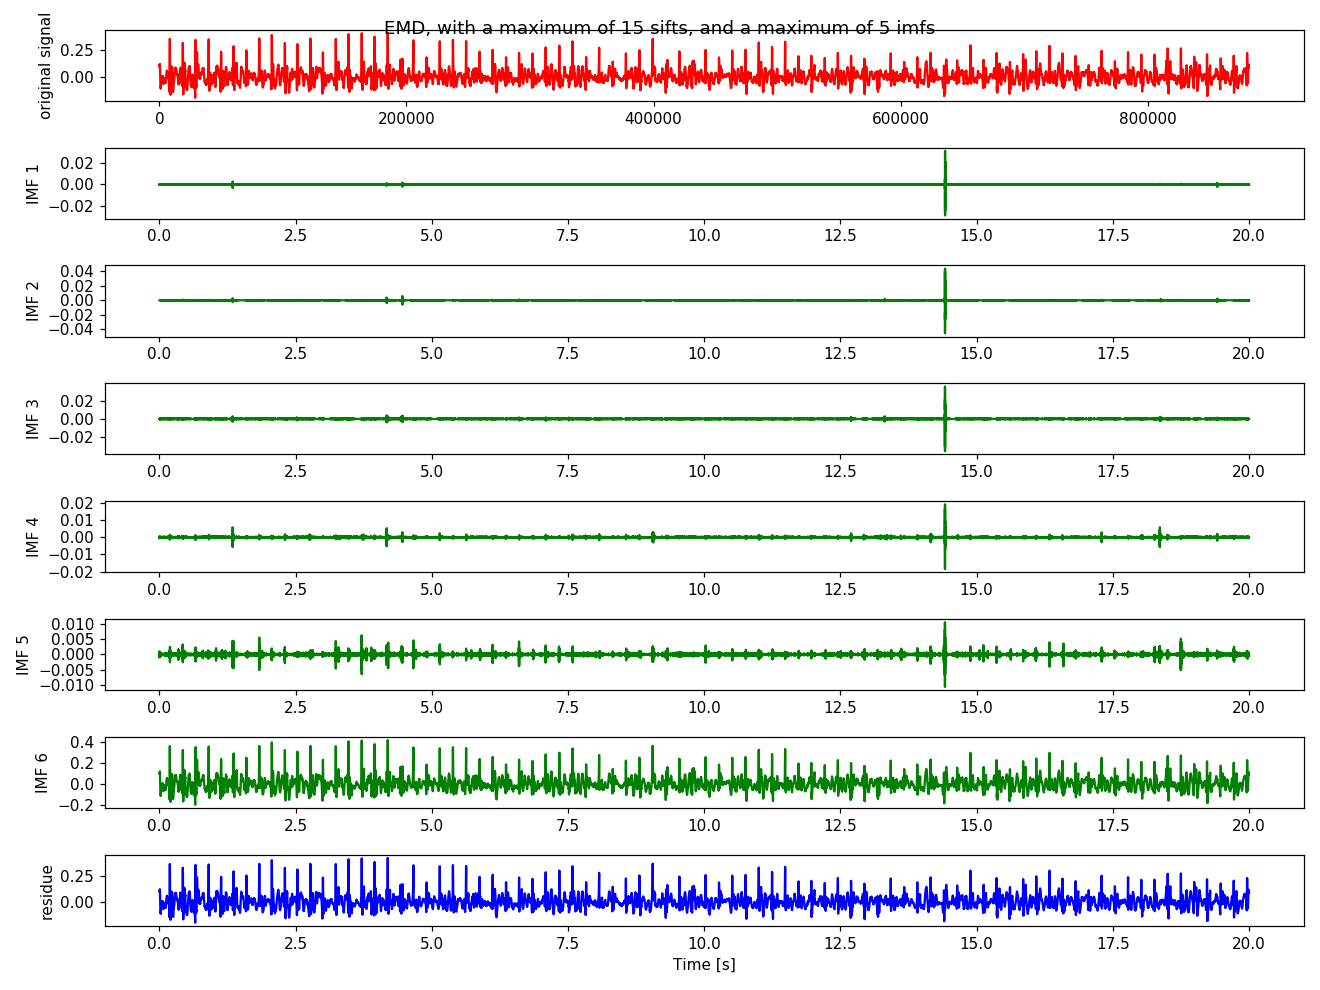

In [76]:
from PyEMD import EEMD
import numpy as np
import pylab as plt
from PyEMD import EMD
m_imf = 5
m_sift = 15

emd = EMD()
emd.spline_kind="slinear"
emd.FIXE = m_sift

# Execute EEMD on S
IMFs = emd.emd(audio, x, max_imf = 5)
nIMFs = IMFs.shape[0]
_, residue = emd.get_imfs_and_residue()
# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+2, 1, 1)
plt.plot(audio, 'r')
plt.ylabel("original signal")

for n in range(nIMFs):
    plt.subplot(nIMFs+2, 1, n+2)
    plt.plot(x, IMFs[n], 'g')
    plt.ylabel("IMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)
plt.suptitle(f'EMD, with a maximum of {m_sift} sifts, and a maximum of {m_imf} imfs')

plt.subplot(nIMFs+2, 1, nIMFs+2)
plt.plot(x, residue, 'b')
plt.ylabel("residue")

plt.xlabel("Time [s]")
plt.tight_layout()
plt.show()

Use EEMD instead ?? 

ValueError: x and y must have same first dimension, but have shapes (220500,) and (882000,)

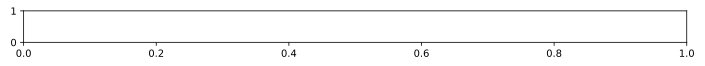

In [24]:
from PyEMD import EEMD
import numpy as np
import pylab as plt
from PyEMD import EMD
m_imf = 10
m_sift = 15
m_trials = 5
# Say we want detect extrema using parabolic method
eemd = EEMD(trials=m_trials)
eemd.spline_kind="slinear"
eemd.FIXE = m_sift


# Execute EEMD on S
eIMFs = eemd.eemd(audio_l, x, max_imf = m_imf)
neIMFs = eIMFs.shape[0]
_, residue = eemd.get_imfs_and_residue()



# Plot results
plt.figure(figsize=(12,9))
plt.subplot(neIMFs+2, 1, 1)
plt.plot(x, audio, 'r')

for n in range(neIMFs):
    plt.subplot(neIMFs+2, 1, n+2)
    plt.plot(x, eIMFs[n], 'g')
    plt.ylabel("IMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)
plt.suptitle(f'EEMD, with a maximum of {m_sift} sifts, a maximum of {m_imf} imfs and {m_trials} number of trials')

plt.subplot(neIMFs+2, 1, neIMFs+2)
plt.plot(x, residue, 'b')
plt.ylabel("residue")

plt.xlabel("Time [s]")
plt.tight_layout()
plt.show()

In [29]:
eIMFs

array([[-0.00877952, -0.02771577, -0.02768541, ...,  0.02196934,
         0.00300371, -0.02276647],
       [-0.00132001, -0.01934542, -0.01520472, ...,  0.03116212,
         0.02338509,  0.00183033],
       [ 0.00384473,  0.00509453,  0.00382169, ..., -0.00358641,
        -0.00353064, -0.00242747],
       ...,
       [-0.00487001, -0.00495747, -0.00504245, ...,  0.00289322,
         0.00287448,  0.00284539],
       [ 0.00452098,  0.00451739,  0.00451242, ..., -0.00480272,
        -0.00480009, -0.004799  ],
       [ 0.1019442 ,  0.10195052,  0.10195767, ...,  0.00511874,
         0.00514882,  0.00517939]])

In [32]:
best_IMFS = [range(len(eIMFs)-1)]

[range(0, 10)]

In [ ]:
# Plot results
best_IMFS = [7,8,9,10]
plt.figure(figsize=(18,12))
plt.suptitle(f'EEMD, with a maximum of {m_sift} sifts, a maximum of {m_imf} imfs and {m_trials} number of trials \n Anterior left recording location')
plt.subplot(len(best_IMFS)+2, 1, 1)
plt.plot(x, audio, 'r')
plt.ylabel("original audio")

for n in range(neIMFs):
    if n in best_IMFS:
        idx = best_IMFS.index(n)
        plt.subplot(len(best_IMFS)+2, 1, idx + 2)
        plt.plot(x, eIMFs[n], 'g')
        plt.ylabel("IMF %i" %(n+1))
        plt.locator_params(axis='y', nbins=5)

plt.subplot(neIMFs+2, 1, neIMFs+2)
plt.plot(x, residue, 'b')
plt.ylabel("res")
plt.tight_layout()
plt.xlabel("Time [s]")
plt.show()
plt.savefig('EMD_left_best.svg')

/home/andrine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.


<IPython.core.display.Javascript object>


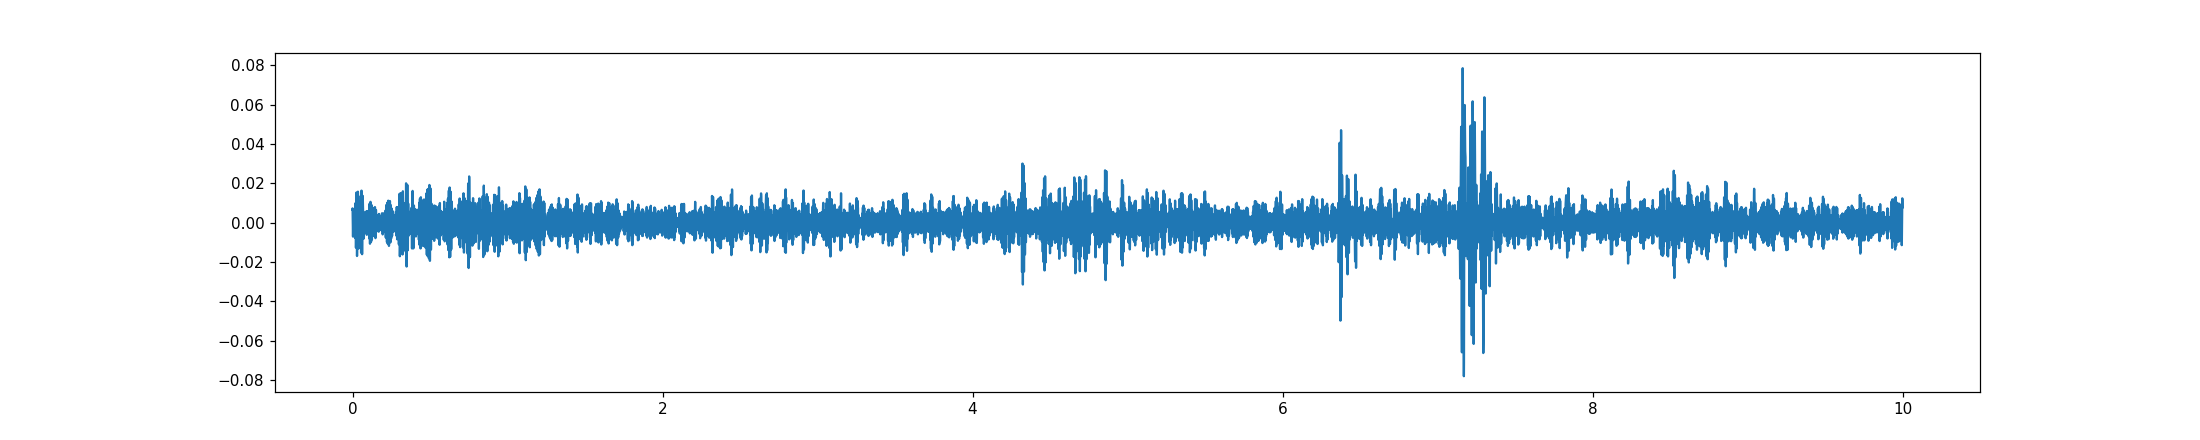

In [93]:
test =  eIMFs[9]
plt.figure(figsize=(20,4))
plt.plot(x,test)

In [22]:
import IPython.display as ipd
ipd.Audio(audio_l, rate = sr)

In [23]:
import IPython.display as ipd
ipd.Audio(audio_r, rate = sr)

In [91]:
import IPython.display as ipd
ipd.Audio(eIMFs[9], rate = sr)

<IPython.core.display.Javascript object>


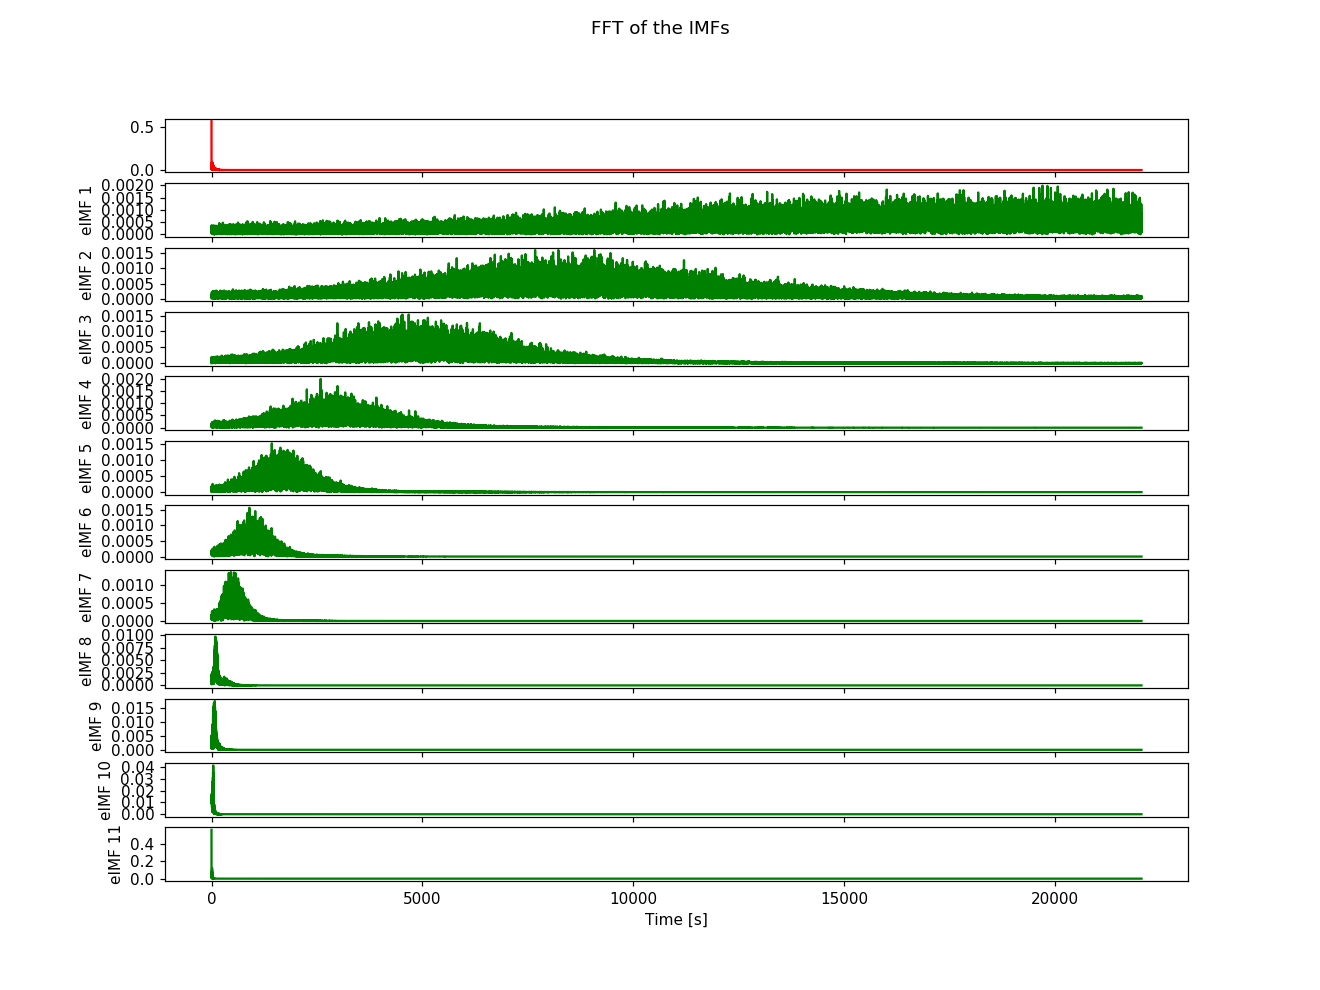

Text(0.5, 0.98, 'FFT of the IMFs')

In [12]:
from scipy.fftpack import fft

yf = fft(audio)

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
# Plot results
plt.figure(figsize=(12,9))

plt.ylabel('FFT of original signal')
plt.subplot(neIMFs+1, 1, 1)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), 'r')

for n in range(neIMFs):
    y_filtered_f = fft(eIMFs[n])

    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    
    plt.subplot(neIMFs+1, 1, n+2)
    plt.plot(xf, 2.0/N * np.abs(y_filtered_f[0:N//2]), 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.xlabel('Time [s]')
    plt.locator_params(axis='y', nbins=5)
plt.suptitle('FFT of the IMFs')

<IPython.core.display.Javascript object>


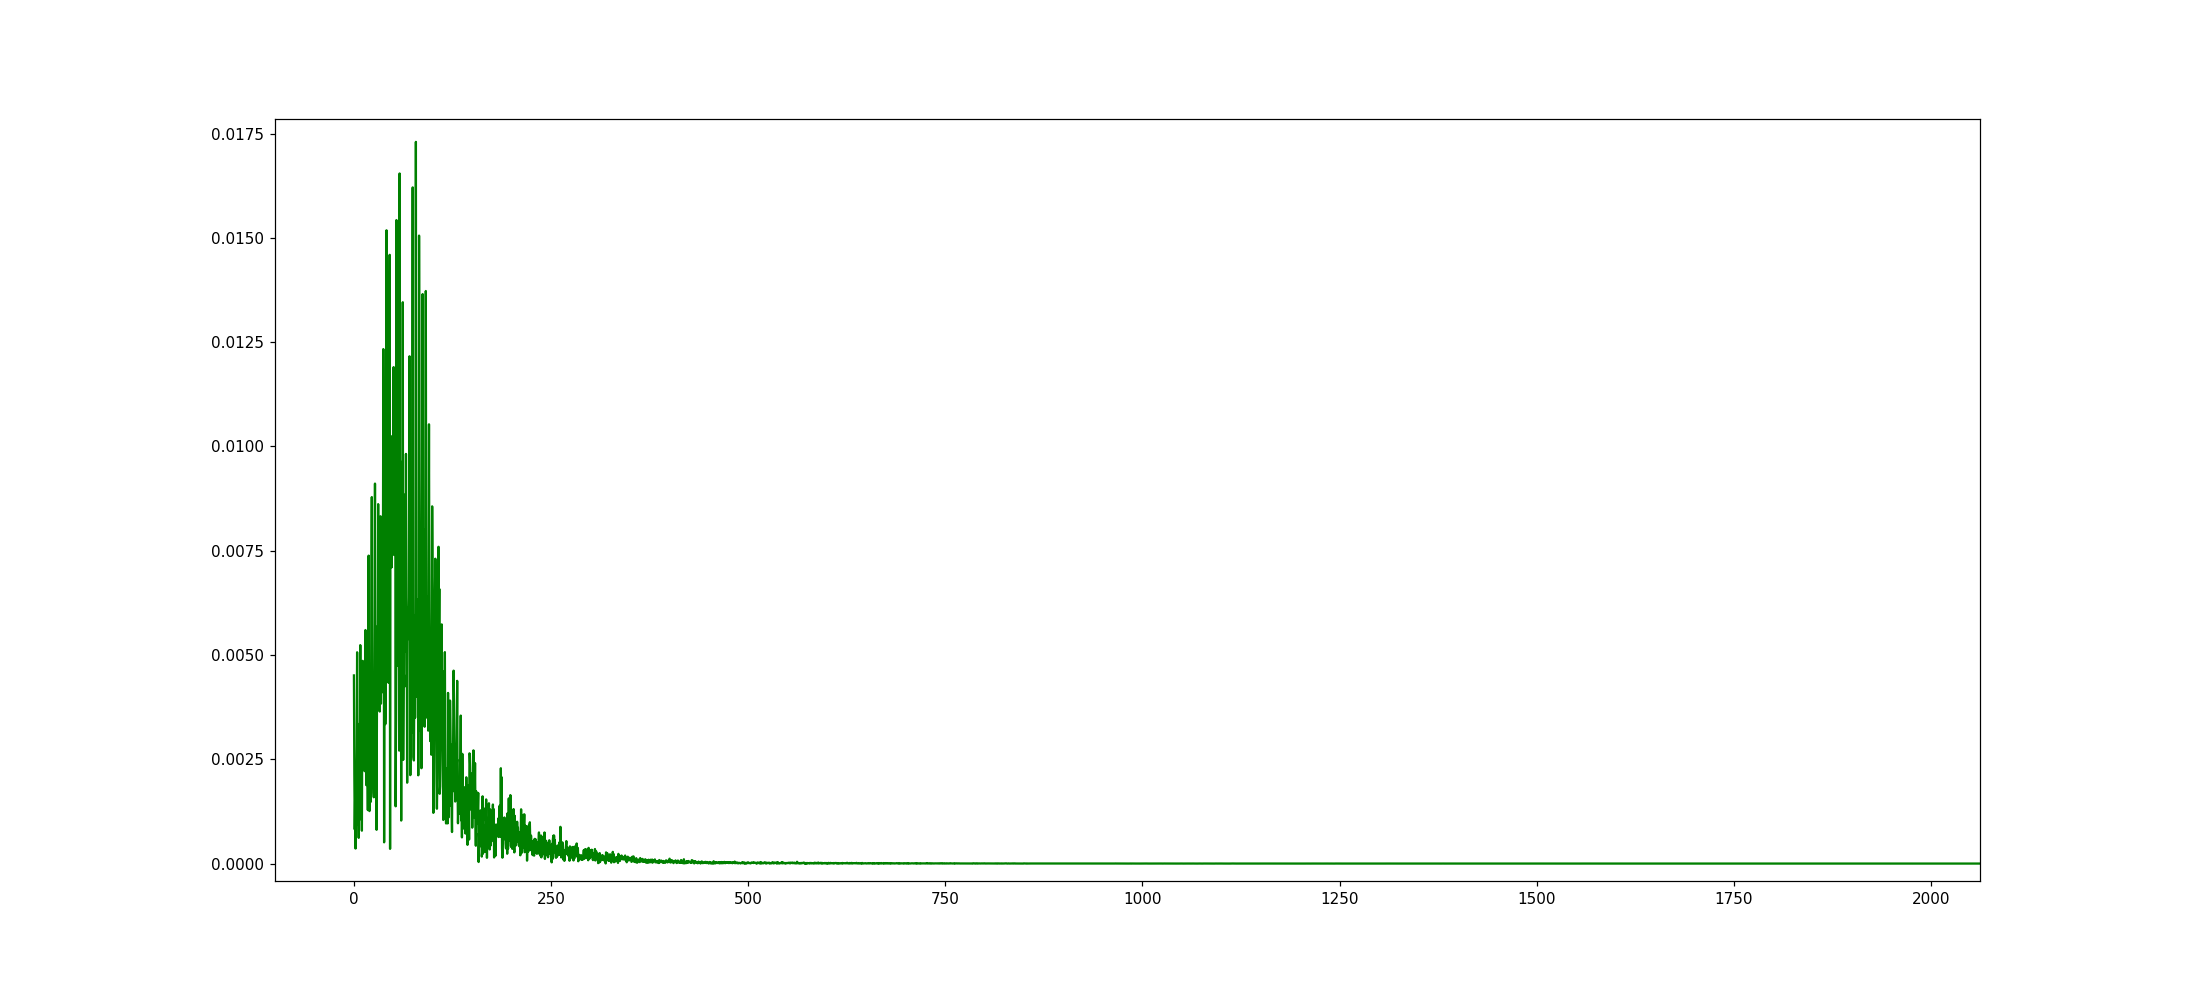

In [43]:
plt.figure(figsize=(20,9))
y_filtered_f = fft(eIMFs[8])

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(y_filtered_f[0:N//2]), 'g')

<IPython.core.display.Javascript object>


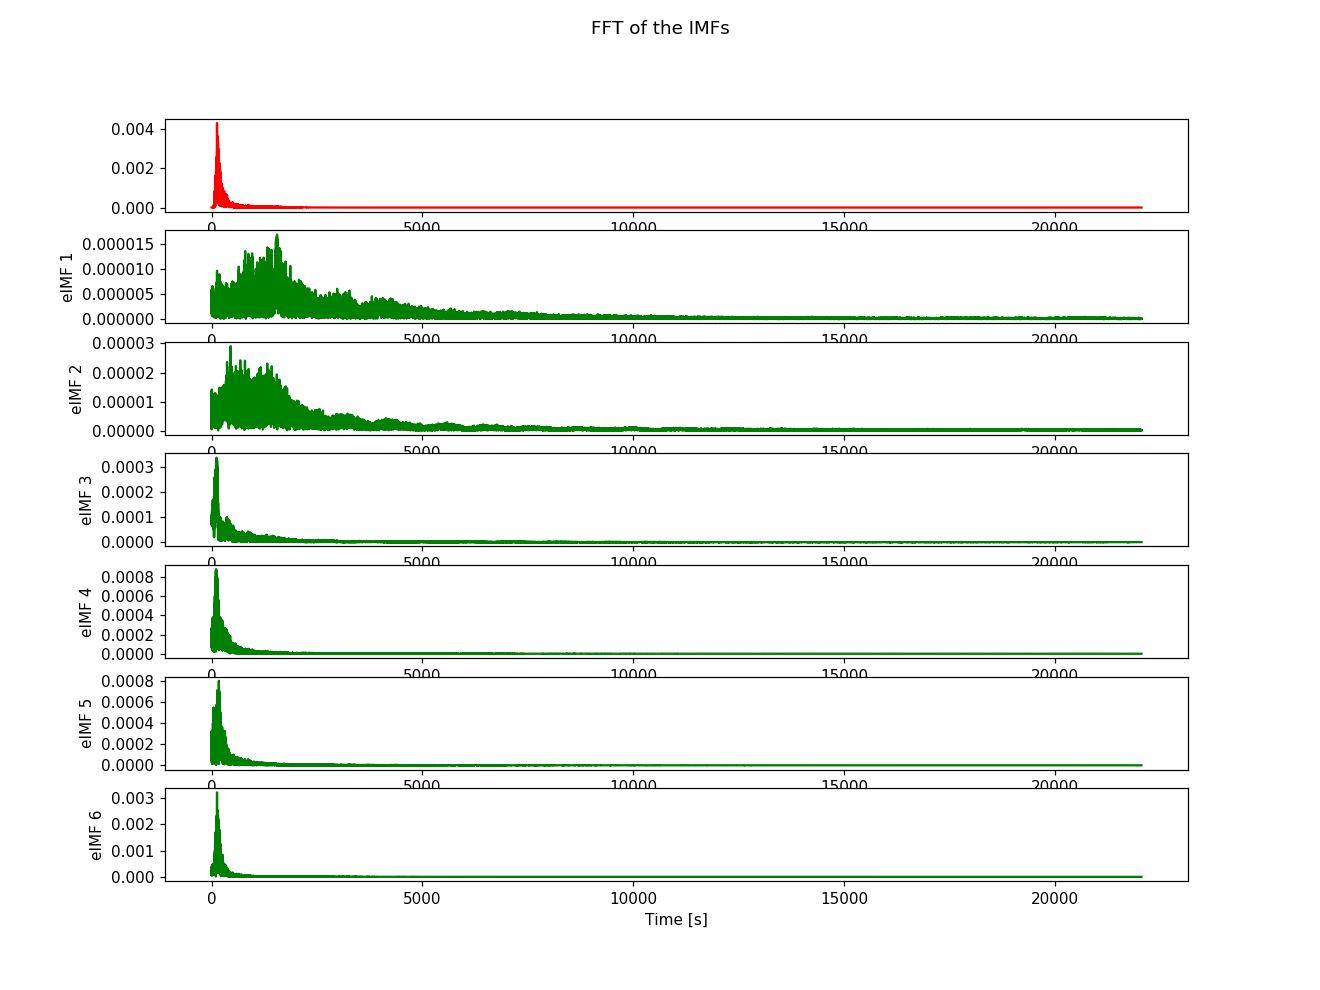

Text(0.5, 0.98, 'FFT of the IMFs')

In [12]:
from scipy.fftpack import fft
yf = fft(y_filtered)

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
# Plot results
plt.figure(figsize=(12,9))

plt.ylabel('FFT of original signal')
plt.subplot(neIMFs+1, 1, 1)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), 'r')

for n in range(nIMFs):
    y_filtered_f = fft(IMFs[n])

    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(xf, 2.0/N * np.abs(y_filtered_f[0:N//2]), 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.xlabel('Time [s]')
    plt.locator_params(axis='y', nbins=5)
plt.suptitle('FFT of the IMFs')

<IPython.core.display.Javascript object>


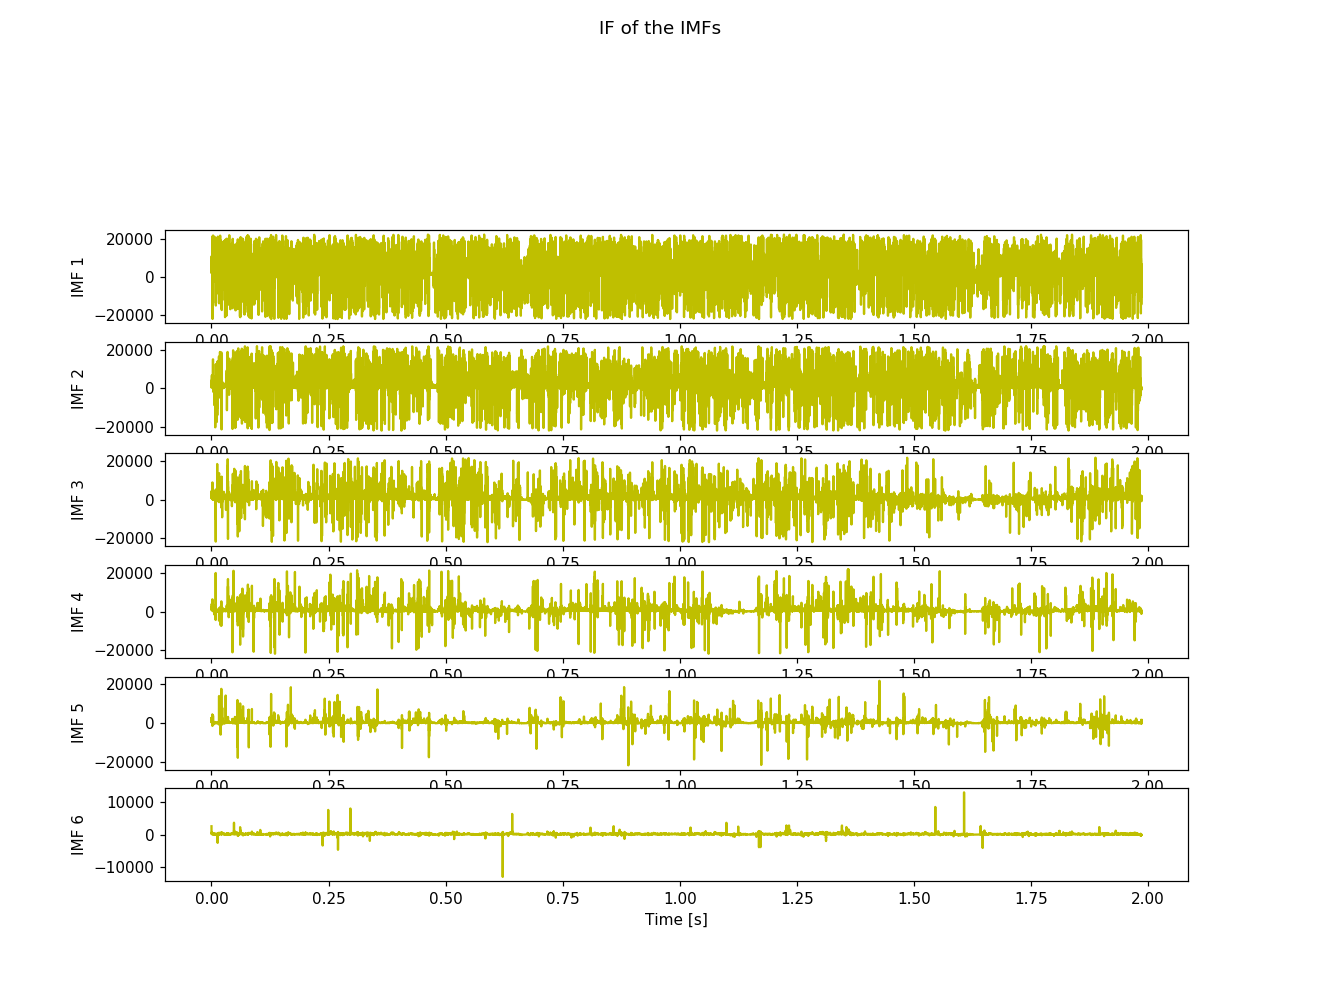

In [14]:
def hilb(s, unwrap=False):
    from scipy.signal import hilbert
    H = hilbert(s)
    amp = np.abs(H)
    phase = np.arctan2(H.imag, H.real)
    if unwrap: phase = np.unwrap(phase)
    return amp, phase

from scipy.signal import hilbert
fs = sr
duration = float(len(audio)) / sr
samples = len(y_filtered)
t = np.arange(samples) / fs
T = 1.0/sr
N = int(duration / T)
plt.figure(figsize=(12,9))
fs = 44100

for n in range(nIMFs):
    #inst_amp, phase = hilb(IMFs[n], unwrap=True)
    #inst_freq = np.diff(phase)
    #instf, timestamps = inst_freq(IMFs[n])
    #plt.plot(timestamps, instf)
    analytic_signal = hilbert(IMFs[n])
    amplitude_envelope = np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = (np.diff(instantaneous_phase)/(2.0*np.pi) * fs)
    #print(instantaneous_frequency.shape)
    
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t[1:], instantaneous_frequency, 'y')
    plt.ylabel("IMF %i" %(n+1))
    plt.xlabel('Time [s]')
    
plt.suptitle('IF of the IMFs')
plt.savefig('EMD_IF.png', bbox_inches='tight')